<a href="https://colab.research.google.com/github/jp0utside/Math-152/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2 - The Random Walk

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw

In [ ]:
steps = 1000

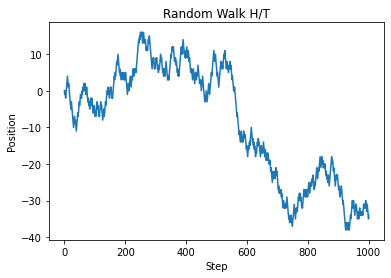

In [ ]:
def basic_walk() -> list:
    """
    Generates simple random walk.
    :return positions:
    """
    positions = [0]
    for i in range(steps):
        rand = np.random.randint(0, 2)
        if rand:
            positions.append(positions[-1] + 1)
        if not rand:
            positions.append(positions[-1] - 1)
    return positions

positions = basic_walk()
plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("Random Walk H/T")
plt.show()

In [ ]:
print(f"Starting position: 0")
print(f"Last Position (step {steps}): {positions[-1]}")
print(f"Square root of {steps} steps: {np.sqrt(steps)}")

Starting position: 0
Last Position (step 1000): -34
Square root of 1000 steps: 31.622776601683793


For this walk, we consider 3 static points representing the corners of a triangle, and a random starting point for the walk. Then we iterate the following procedure: We first roll a 3 sided dice to figure out which vertex the point walks towards, each step going halfway between its current position and the vertex's position.

In [ ]:
def points_walk(iters) -> list:
    # Initializing the positions
    positions = np.zeros((iters, 2))
    positions[0, :] = np.random.uniform(-1,1, 2)

    # Arrange n static points evenly spaced around a unit circle
    statics = np.vstack((np.cos(np.linspace(0,2*np.pi, 4))[::-1], np.sin(np.linspace(0,2*np.pi,4))[::-1])).T
    for i in range(1, iters):
        vertex = np.random.randint(0,3)
        positions[i, :] = (positions[i-1]+statics[vertex])/2
    return positions.T

Text(0.5, 1.0, '3 points walk')

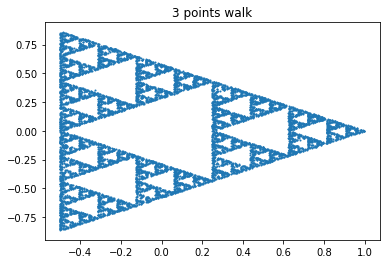

In [ ]:
xvals, yvals = points_walk(iters=10000)
plt.scatter(xvals, yvals, s=1)
plt.title("3 points walk")

Planetary Walk

For this 2-dimensional walk, we will define one or more stationary objects that pull our random walkers towards them. When our random walkers are within a certain radius of the stationary objects, they begin to repel our walkers.

In [ ]:
def distance(a,b):
    return np.sqrt((b[1] - a[1]) ** 2 + (b[0] - a[0]) ** 2)

def push_vector(a,b): # returns unit vector pointing from a to b
    return np.array( [b[0] - a[0],b[1] - a[1]],dtype = np.float64) / distance(a,b)
def planetary_walk(tractors, walkers,steps):
    positions = np.zeros(shape = (steps,len(walkers),2))
    positions[0] = walkers[:]
    for i in range(1,steps):
        for j in range(len(walkers)):
            step_vector =  np.array([0,0],dtype = np.float64)
            for k in range(len(tractors)):
                dist = distance(positions[i-1][j],tractors[k])
                push = push_vector(positions[i-1,j],tractors[k])
                if dist < 50:
                    step_vector -= 10. * push
                elif dist < 167:
                    step_vector += 6. * push
                else:
                    step_vector += 1. * push
            step_vector /= len(tractors)
            step_vector +=  np.array([12. * np.random.randint(2) - 6., 12. * np.random.randint(2) - 6.])
            positions[i][j] = positions[i-1][j] + step_vector
    return np.array(positions)
def draw_ellipse(draw,center,vertical_radius,horizontal_radius,fl,out,image_size):
    draw.ellipse((center[0] - vertical_radius,image_size[1] - center[1] - horizontal_radius,center[0] + vertical_radius,image_size[1] - center[1] + horizontal_radius),fill = fl, outline = out)

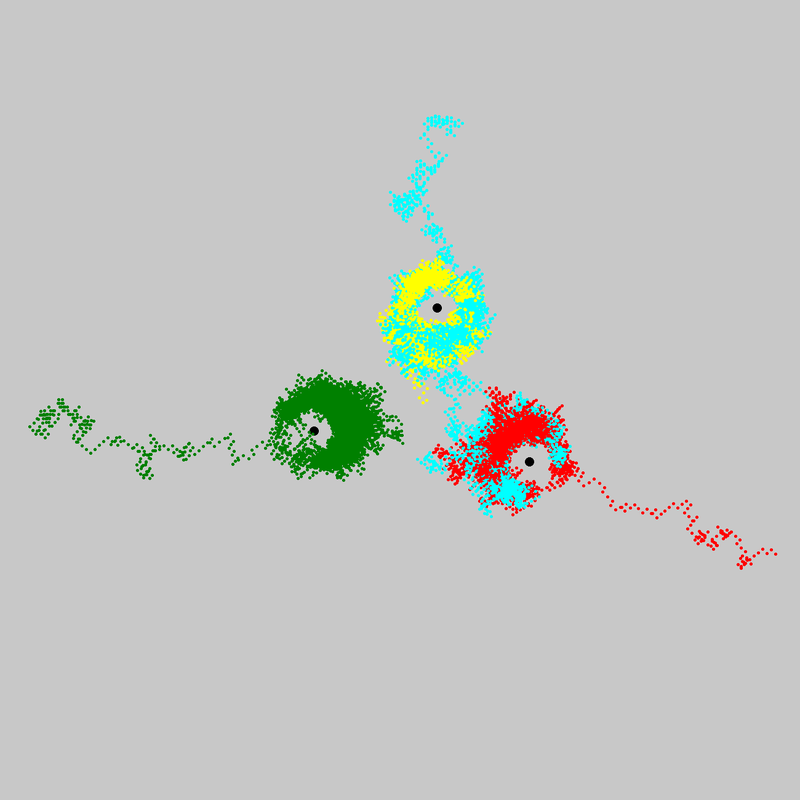

In [ ]:
tractors = np.array([[400,250],[50,300],[250,500]])
average = .3333* (tractors[0] + tractors[1] + tractors[2])
walkers = np.array([[800,100],[-400,300],[250,800],average])
steps = 10000
walk = planetary_walk(tractors,walkers,steps)
image_size = (1300,1300,3)
image = Image.fromarray(200 + np.zeros(shape=image_size,dtype = np.uint8))
draw = ImageDraw.Draw(image)
offset = np.array([-460,-300])
colors = ['red','green','cyan','yellow']
for tractor in tractors:
    draw_ellipse(draw,-offset + tractor,7,7,'black','black',image_size)
for walkerlist in walk:
    for i in range(len(walkerlist)):
        walker = walkerlist[i]
        draw_ellipse(draw,-offset + walker,2,2,colors[i],colors[i],image_size)
display(image.resize((800,800),Image.ANTIALIAS))

We will now do some analysis. First, we will examine each walker's average distance to the tractors.

In [ ]:
walkers_avg_distance = np.zeros((steps,len(walkers)))
walkers_min_distance = np.zeros((steps,len(walkers)))
np.shape(walkers_avg_distance[:,0])
for i in range(steps):
    for j in range(len(walk[i])):
        walker = walk[i][j]
        avg_distance = 0
        min_distance = 1000000
        for tractor in tractors:
            dist = distance(walker,tractor)
            avg_distance  += dist
            min_distance = min(min_distance,dist)
        avg_distance /= len(tractors)
        walkers_avg_distance[i,j] = avg_distance
        walkers_min_distance[i,j] = min_distance

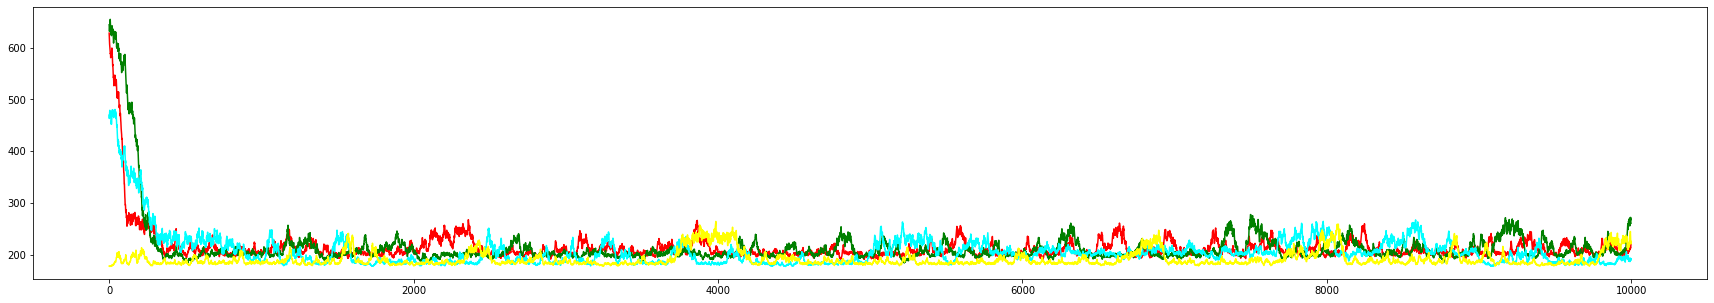

In [ ]:
plt.figure(figsize = (30,5))
for i in range(np.size(walkers_avg_distance,1)):
    plt.plot(walkers_avg_distance[:,i],color = colors[i])

As you can see in this graph, each walker quickly gets as close it can to a tractor and stays relatively stable around it.

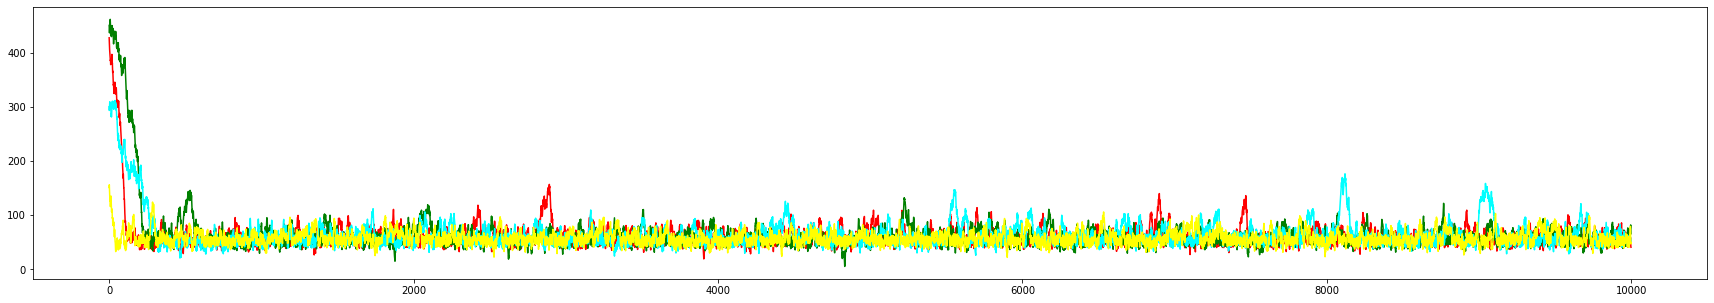

In [ ]:
plt.figure(figsize = (30,5))
for i in range(np.size(walkers_min_distance,1)):
    plt.plot(walkers_min_distance[:,i],color = colors[i])

The most notable aspect of this graph is the large spikes where a random walker begins to orbit a different tractor. In this transition, its minimum distance rises. You can see this happening with the blue walker above.

#Random Waves and Gradients

For these images, we represented the "random walk" as a sequence of red, green, and blue values in an image. Each image starts with a monochrome row of pixels, either all the same or varying in luminance. Then the proceeding rows change each of the red, green, and blue values, either by a fixed or varying interval that is randomly generated. Some only move positively and others move both positive and negatively.

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

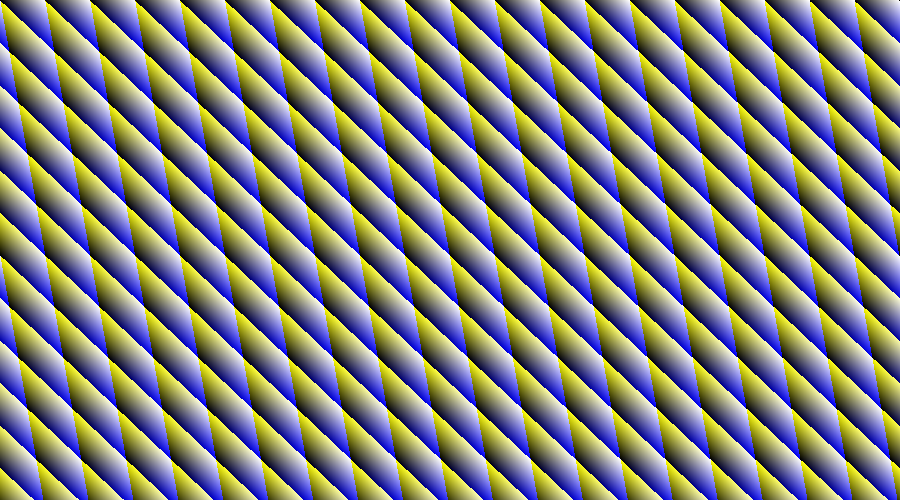

In [21]:
def hex_waves(width = 300, height = 300, w = 1, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  coeffs = np.random.randint(-r, r, size=3)
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = coeffs[0]+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = coeffs[1]+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = coeffs[2]+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
hex_waves(900, 500, 20, 9)

This image utilizes a static randomly generated interval for each rgb value, and starts with a gradient monochrome pattern. The function allows you to specify the number of waves, as well as the upper bound on the intervals.

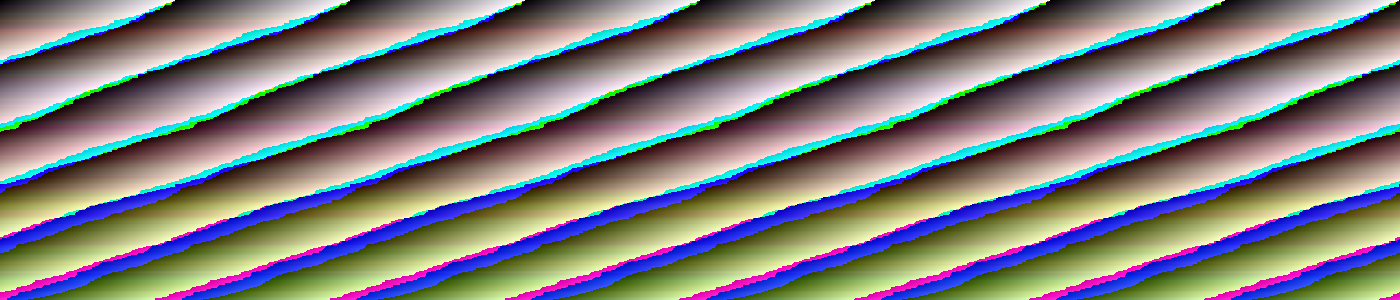

In [24]:
def rand_waves(width = 300, height = 300, w = 5, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = np.random.randint(0, r)+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = np.random.randint(0, r)+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = np.random.randint(0, r)+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
rand_waves(1400, 300, 8, 10)

This image utilizes dynamic randomly generated interavals for each rgb value, as well as a monochrome gradient. This leads to a generally consistant monochrome wave, but the color shines through the cracks where certain of the red, green, and blue values "mod" 255 are equal to close to zero while others haven't crossed the line yet and thus are shining brightly.

In [ ]:
def osc_rand_waves(width = 300, height = 300, w = 5, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  coeffs = np.random.randint(1, 10, size=3)
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = np.random.randint(-r, r)+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = np.random.randint(-r, r)+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = np.random.randint(-r, r)+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
osc_rand_waves(1200, 300, 25, 25)

This image utilizes the same method of generation as the previous, but with the random interval generation allowing for negative as well as positive values.